## To implement SVM

* Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.
* Effective in high dimensional spaces.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

#### 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 2. The dataset is imported using the pandas library. It is imported in a dataframe from the data.csv file

The dataset that I have selected contains 24 features (or attributes) and 194 rows (or instances). It is composed of biomedical voice measurements from 31 people, out of which 23 have Parkinson's Disease.
* Each column is a particular voice measure
* Each row corresponds to the voice recordings of these individuals
* The aim here is to segregate healthy people from the people having Parkinson's Disease using the 'status' column which is set to '0' for healthy people and '1' for people with Parkinson

In [8]:
dataset = pd.read_csv('data.csv')
dataset=dataset.drop(['name'],axis=1)
x=dataset.iloc[:,:-1].values
y=dataset.loc[:,'status'].values
dataset.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [9]:
x.shape

(195, 22)

#### 3. Preprocessing the data using  MinMaxScaler Scaler before training it

MinMaxScaler is an estimator that scales and translates each feature individually such that it is in the given range on the training set, e.g. here it is scaled between -1 and 1.

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(x)

#### 4. Splitting our dataset into Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 9)

- we can check how our training and testing data look after splitting

In [12]:
x

array([[-0.63138346, -0.77481654, -0.89037042, ...,  0.17153026,
        -0.21867743, -0.0053808 ],
       [-0.6033463 , -0.81013911, -0.4433544 , ...,  0.48267409,
        -0.05370956,  0.34265204],
       [-0.66992292, -0.88174367, -0.46942324, ...,  0.37274182,
        -0.18236124,  0.19336492],
       ...,
       [ 0.00546073, -0.43717403, -0.89854572, ..., -0.31484696,
         0.11793486, -0.63884033],
       [ 0.28578581,  0.20361309, -0.89144127, ..., -0.09423055,
        -0.36355605, -0.67372646],
       [ 0.46654868, -0.35441175, -0.85610326, ..., -0.16981039,
         0.00734563, -0.5690805 ]])

In [13]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [14]:
x_train

array([[-0.76161423, -0.86727089, -0.56938063, ..., -0.10276688,
        -0.49853639,  0.12736212],
       [-0.74244929, -0.89603274, -0.53852177, ...,  0.42168615,
         0.07524641, -0.23873512],
       [-0.19528212, -0.75046388, -0.03129642, ..., -0.21545904,
        -0.18050259, -0.50136695],
       ...,
       [ 0.46654868, -0.35441175, -0.85610326, ..., -0.16981039,
         0.00734563, -0.5690805 ],
       [-0.30210977, -0.74343366, -0.11542137, ..., -0.63276672,
        -0.18051327, -0.41200593],
       [-0.42002189, -0.61177419, -0.81993621, ..., -0.63580576,
        -0.64587778, -0.2977375 ]])

In [15]:
x_test

array([[-0.31872482, -0.56497545, -0.81276267, ..., -0.14534047,
        -0.20731822, -0.50930766],
       [ 0.2813497 , -0.53843045,  0.46957293, ..., -0.23953275,
        -0.92082453, -0.78550954],
       [ 0.15734811, -0.59101014,  0.23825809, ...,  0.1733762 ,
        -0.14651839, -0.518868  ],
       ...,
       [-0.62818154, -0.85670515, -0.43182839, ...,  0.13191016,
        -0.61608244, -0.3073434 ],
       [-0.41949794, -0.58611919, -0.79430493, ..., -0.30667981,
        -0.40641443, -0.23221934],
       [ 0.33082225,  0.89266869,  0.28711412, ...,  0.15261616,
         0.32296558, -0.06536489]])

In [16]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [17]:
y_test

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1], dtype=int64)

#### 5. Import the Support Vector Classifier from sklearn.svm

* Create a SVC classifier
* Train the model using the training sets

#### Setting 'Linear' as the kernel type and creating a SVC classifier

In [18]:
from sklearn.svm import SVC
#Create a SVC classifier
classifier = SVC(kernel = 'linear')
#Train the model using the training sets
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Setting 'Polynomial' as the kernel type and creating a SVC classifier

In [19]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'poly',degree = 5) #Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
#Train the model using the training sets
classifier2.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Setting 'Gaussian' as the kernel type and creating a SVC classifier

In [20]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'rbf')
#Train the model using the training sets
classifier3.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Setting 'Sigmoid' as the kernel type and creating a SVC classifier

In [21]:
from sklearn.svm import SVC
classifier4 = SVC(kernel = 'sigmoid')
#Train the model using the training sets
classifier4.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### 6. Predict the output using the .predict() method provided by sklearn

In [22]:
preds=classifier.predict(x_test)
preds

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1], dtype=int64)

In [23]:
preds2=classifier2.predict(x_test)
preds2

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1], dtype=int64)

In [24]:
preds3=classifier3.predict(x_test)
preds3

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1], dtype=int64)

In [25]:
preds4=classifier4.predict(x_test)
preds4

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

#### 7. Import classification report, accuracy score and confusion matrix to view the results

In [26]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, plot_confusion_matrix

* Print the <b>confusion matrix</b>

In [27]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[ 8  5]
 [ 0 36]]


Confusion matrix, without normalization
[[ 8  5]
 [ 0 36]]
Normalized confusion matrix
[[0.61538462 0.38461538]
 [0.         1.        ]]


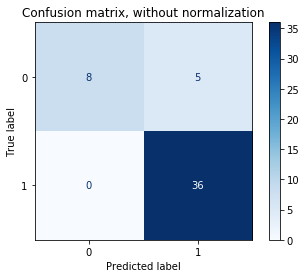

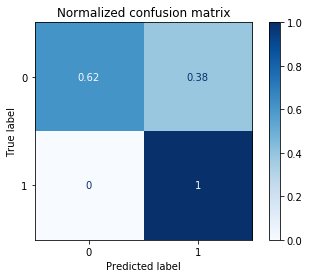

In [28]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [29]:
cm = confusion_matrix(y_test,preds2)
print(cm)

[[12  1]
 [ 0 36]]


In [30]:
cm = confusion_matrix(y_test,preds3)
print(cm)

[[ 6  7]
 [ 0 36]]


In [31]:
cm = confusion_matrix(y_test,preds4)
print(cm)

[[ 0 13]
 [ 0 36]]


* Print the <b>classification report</b>

In [32]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.88      1.00      0.94        36

    accuracy                           0.90        49
   macro avg       0.94      0.81      0.85        49
weighted avg       0.91      0.90      0.89        49



In [33]:
print(classification_report(y_test,preds2))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.97      1.00      0.99        36

    accuracy                           0.98        49
   macro avg       0.99      0.96      0.97        49
weighted avg       0.98      0.98      0.98        49



In [34]:
print(classification_report(y_test,preds3))

              precision    recall  f1-score   support

           0       1.00      0.46      0.63        13
           1       0.84      1.00      0.91        36

    accuracy                           0.86        49
   macro avg       0.92      0.73      0.77        49
weighted avg       0.88      0.86      0.84        49



In [35]:
print(classification_report(y_test,preds4))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.73      1.00      0.85        36

    accuracy                           0.73        49
   macro avg       0.37      0.50      0.42        49
weighted avg       0.54      0.73      0.62        49



C:\Users\deepika\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Print the <b>accuracy</b>

In [36]:
print('accuracy using a linear type kernel:',accuracy_score(y_test.tolist(), preds.tolist())*100)

accuracy using a linear type kernel: 89.79591836734694


Thus it can be concluded from the following that the accuracy is about 89.83 % . This model performs better as compared to Naive Bayes Model performed in Practical-4.


In [37]:
print('accuracy using a polynomial type kernel:',accuracy_score(y_test.tolist(), preds2.tolist())*100)

accuracy using a polynomial type kernel: 97.95918367346938


In [38]:
print('accuracy using a gaussian type kernel:',accuracy_score(y_test.tolist(), preds3.tolist())*100)

accuracy using a gaussian type kernel: 85.71428571428571


In [39]:
print('accuracy using a sigmoid type kernel:',accuracy_score(y_test.tolist(), preds4.tolist())*100)

accuracy using a sigmoid type kernel: 73.46938775510205


Therefore it can be seen that the accuracy is the highest when we use the kernel type 'poly'. we attain an accuracy of 97.95%